## Below is a brief information about each columns of the dataset:

- PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

- Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

- Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

- Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

- Sex: Passenger's sex. It's either Male or Female.

- Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

- SibSp: Number of siblings or spouses travelling with each passenger.

- Parch: Number of parents of children travelling with each passenger.
- Ticket: Ticket number.
- Fare: How much money the passenger has paid for the travel journey.
- Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
- Embarked: Port from where the particular passenger was embarked/boarded.

In [118]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Preprocessing and metrics
from sklearn.preprocessing import scale,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [119]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
print('----train dataset column types information-------')
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

----train dataset column types information-------


,Column Type,Count
0,int64,5
1,float64,2
2,object,5


In [121]:
dtype_df

,Count,Column Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [122]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Buss, Miss. Kate",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [123]:
# Checking survived and not survived in the target variable.
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]
print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(df)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(df)*100.0))
print ("Total: %i"%len(df))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [124]:
print(df.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [125]:
print(df.groupby('Pclass').Survived.value_counts())

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


In [126]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


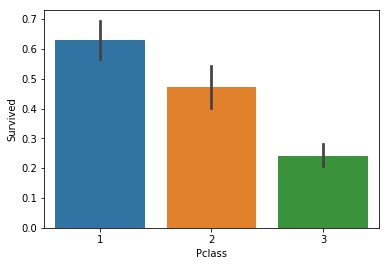

In [127]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sb.barplot(x='Pclass', y='Survived', data=df)

In [128]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [129]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [130]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


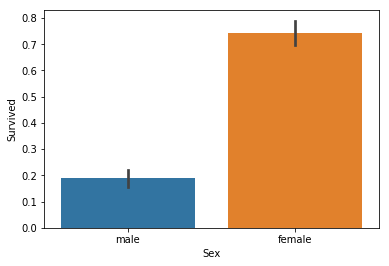

In [131]:
#train.groupby('Sex').Survived.mean().plot(kind='bar')
sb.barplot(x='Sex', y='Survived', data=df)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0,0.5,'Percentage')

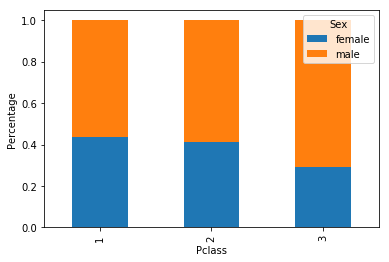

In [132]:
tab = pd.crosstab(df['Pclass'], df['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

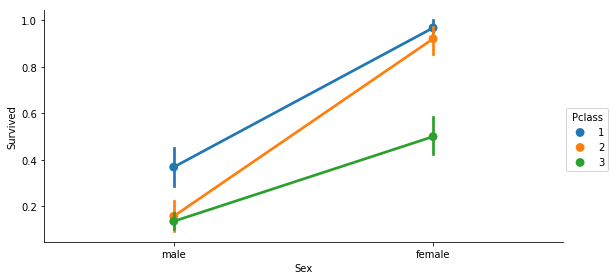

In [133]:
sb.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=df)

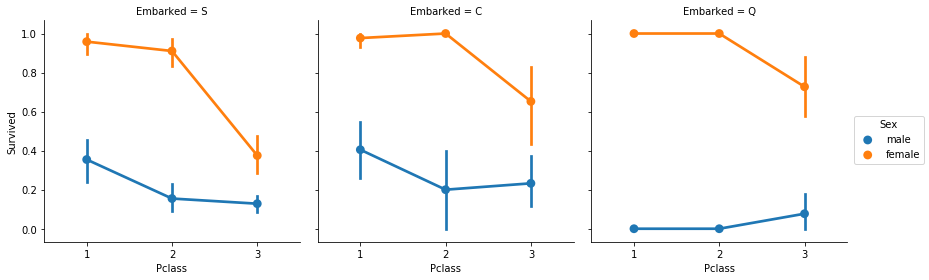

In [134]:
sb.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df)

In [135]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
df.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [137]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


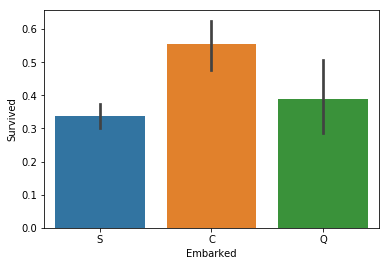

In [138]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sb.barplot(x='Embarked', y='Survived', data=df)

In [139]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [140]:
df.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [141]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


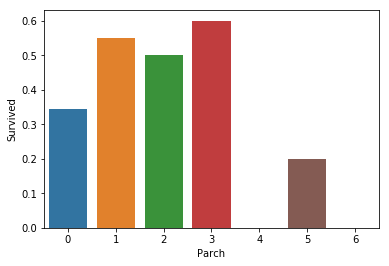

In [142]:
#train.groupby('Parch').Survived.mean().plot(kind='bar')
sb.barplot(x='Parch', y='Survived', ci=None, data=df) # ci=None will hide the error bar

In [143]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [144]:
df.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [145]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


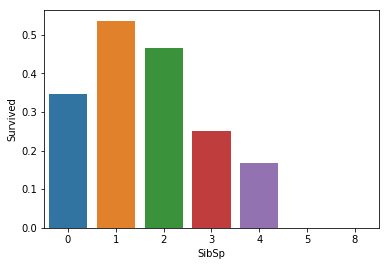

In [146]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sb.barplot(x='SibSp', y='Survived', ci=None, data=df) # ci=None will hide the error bar

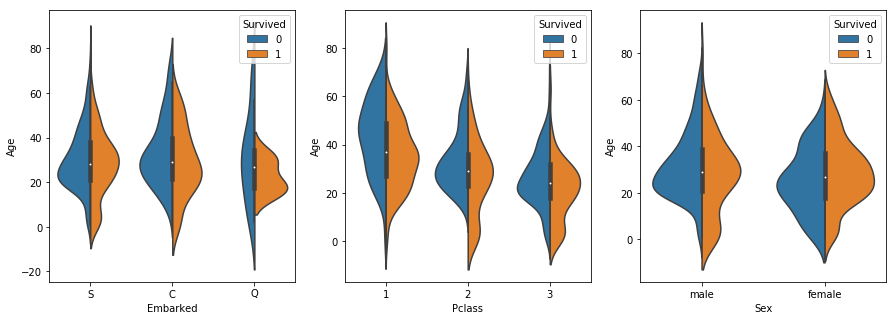

In [147]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sb.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True, ax=ax1)
sb.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sb.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

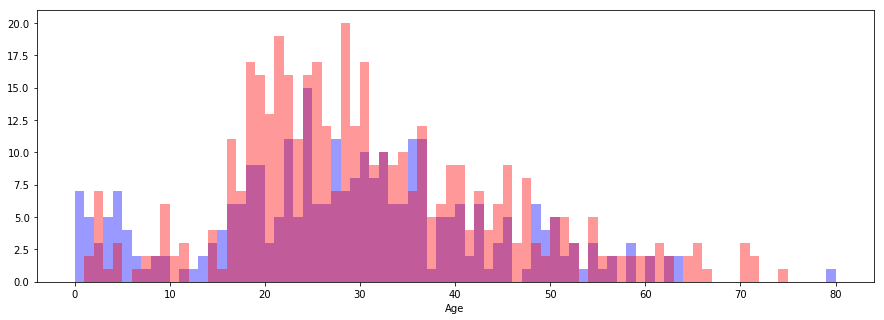

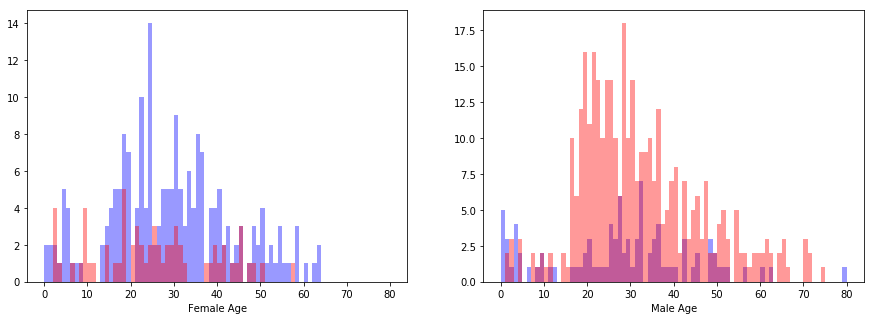

In [148]:
total_survived = df[df['Survived']==1]
total_not_survived = df[df['Survived']==0]
male_survived = df[(df['Survived']==1) & (df['Sex']=="male")]
female_survived = df[(df['Survived']==1) & (df['Sex']=="female")]
male_not_survived = df[(df['Survived']==0) & (df['Sex']=="male")]
female_not_survived = df[(df['Survived']==0) & (df['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sb.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sb.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sb.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sb.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sb.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sb.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

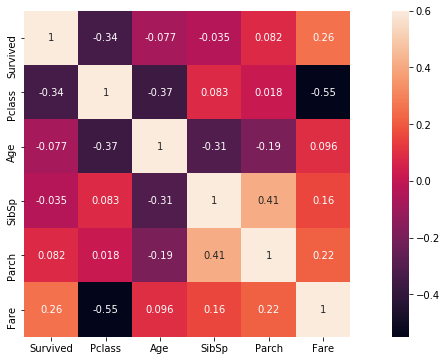

In [149]:
plt.figure(figsize=(15,6))
sb.heatmap(df.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [150]:
train_test_data = [df, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [151]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [152]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [153]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [154]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [155]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [156]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [157]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [158]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [159]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [160]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
df['AgeBand'] = pd.cut(df['Age'], 5)

print (df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.513761
1   (16.0, 32.0]  0.348993
2   (32.0, 48.0]  0.388235
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [161]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [162]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(df['Fare'].median())

In [163]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
print (df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [164]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [165]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [166]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [167]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
df = df.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
df = df.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [168]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [169]:
df = df.join(pd.get_dummies(df["Pclass"],prefix="Pclass"))
df = df.join(pd.get_dummies(df["Age"],prefix="Age"))
df = df.join(pd.get_dummies(df["Fare"],prefix="Fare"))
df = df.join(pd.get_dummies(df["Embarked"],prefix="Embarked"))
df = df.join(pd.get_dummies(df["Title"],prefix="Title"))

test = test.join(pd.get_dummies(test["Pclass"],prefix="Pclass"))
test = test.join(pd.get_dummies(test["Age"],prefix="Age"))
test = test.join(pd.get_dummies(test["Fare"],prefix="Fare"))
test = test.join(pd.get_dummies(test["Embarked"],prefix="Embarked"))
test = test.join(pd.get_dummies(test["Title"],prefix="Title"))
df.head(), test.head()

(   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Pclass_1  \
 0         0       3    0    1     0         0      1        0         0   
 1         1       1    1    2     3         1      3        0         1   
 2         1       3    1    1     1         0      2        1         0   
 3         1       1    1    2     3         0      3        0         1   
 4         0       3    0    2     1         0      1        1         0   
 
    Pclass_2   ...     Fare_2  Fare_3  Embarked_0  Embarked_1  Embarked_2  \
 0         0   ...          0       0           1           0           0   
 1         0   ...          0       1           0           1           0   
 2         0   ...          0       0           1           0           0   
 3         0   ...          0       1           1           0           0   
 4         0   ...          0       0           1           0           0   
 
    Title_1  Title_2  Title_3  Title_4  Title_5  
 0        1        0        

In [170]:
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 27), (891,), (418, 27))

In [171]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

87.09


Accuracy: 87 % 

Confusion Matrix in Numbers
[[506  43]
 [ 72 270]]

Confusion Matrix in Percentage
[[0.92 0.08]
 [0.21 0.79]]



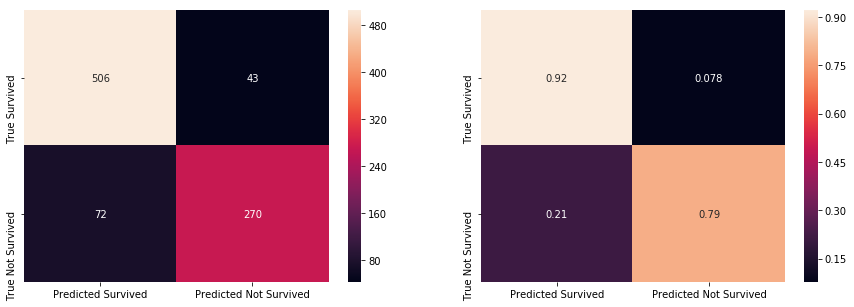

In [172]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sb.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sb.heatmap(df_cnf_matrix_percent, annot=True)

In [173]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })

submission.to_csv('submission.csv', index=False)